Mean Absolute Error :  3.095984211191365e-08
Mean Squared Error :  1.2656926123641812e-15
 Accuracy: 100.00


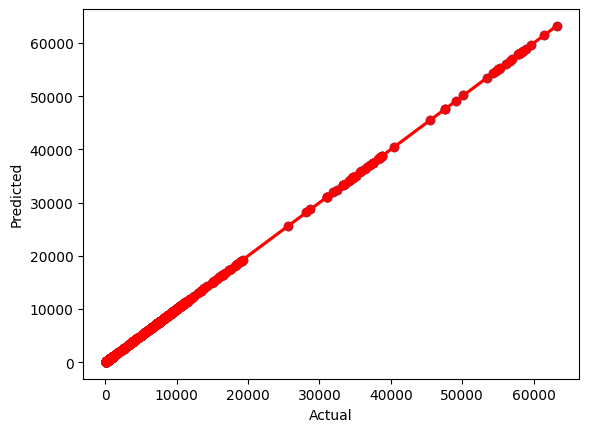

In [50]:
# Aisha Muhammad Nawaz L20-0921 BSCS 6E1 AI LAB 14
# Forecast the value of bitcoin for next 2 months using the historical data provided. Apply Linear Regression. Incorporate all the column.
# Following these considerations.
# 1- Create a target column by averaging the low + high. Drop only open, close columns. Because all 
# of them are contributions to a same value while all other columns are to be treated as features or inputs.
# 2- Preprocess the date column. Convert it into long format.
# 3- Apply Linear Regression and find the error both mean absolute and mean squared error.
# 4- Before applying machine learning divide the data into training and testing part with 70-30 aspect ratio.
# 5- Draw the linear regression line estimated by Model.
# 6- You can either use Scikit-learn to implement Linear Regression and can implement it from scratch.

#Importing Required libraries:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score


#Reading the data:
df=pd.read_excel("/content/coin_Bitcoin.xlsx")
df.dropna(inplace=True) #Dropping null values i.e cleaning our dataset   

#Droping only open, close columns:
df.drop(['Open','Close'],axis=1,inplace=True)

#Creating a target column by averaging the low + high:
df['Target']=(df['Low']+df['High'])/2

#Preproccesing the input coloumns:
df['Name']=1 #As the values in these coloumns are same in all the samples so we shall change them to 1
df['Symbol']=1


#All other columns are to be treated as features or inputs.
xInputs=df.drop(['Target'],axis=1)
yOutput=df['Target'].values


#Preprocessing the date column i.e Converting it into long format:
xInputs['Date']=xInputs['Date'].astype(int)

# Dividing the data into training and testing part with 70-30 aspect ratio:
X_train, X_test, y_train, y_test = train_test_split(xInputs,yOutput,test_size=0.3, random_state=42) #42 helps to get same results after reuse

#Applying Linear Regression and finding the error (both mean absolute and mean squared error):
# Using Scikit-learn to implement Linear Regression :
# (We will have to apply multiple linear regression as we have multiple inputs):

#Here creating linear regression model:
myModel = LinearRegression()
#Fitting the model:
myModel.fit(X_train,y_train)

#Now making predictions based on test data:
ModelPredictions = myModel.predict(X_test)

# Evaluating the Model:
print('Mean Absolute Error : ', mean_absolute_error(y_test, ModelPredictions))
print('Mean Squared Error : ', mean_squared_error(y_test, ModelPredictions))
Accuracy=r2_score(y_test,ModelPredictions)*100
print(" Accuracy: %.2f" %Accuracy)

#Plotting the results:
plt.scatter(y_test,ModelPredictions);
plt.xlabel('Actual');
plt.ylabel('Predicted');

#Drawing the linear regression line estimated by Model:
sns.regplot(x=y_test,y=ModelPredictions,ci=None,color ='red');
